# Part 1: Training an RBM with no phase

## Getting Started

The following imports are needed to run this tutorial:

In [1]:
from rbm_tutorial import RBM_Module, BinomialRBM
import torch
from observables_tutorial import TFIMChainEnergy, TFIMChainMagnetization
import numpy as np
import csv

*rbm_tutorial.py* contains the child class **BinomialRBM** that inherits properties and functions from the parent class **RBM_Module**. 
 
PyTorch (torch) is used as a replacement for doing some algebra that would normally be done with numpy. PyTorch also allows one to take advantage of GPU acceleration among many other things. Don't worry if you don't have a GPU on your machine - the tutorial will run in no time on a CPU.

*observables_tutorial* is a package that will allow us to calculate quantities like the energy and magnetization of samples that we generate after training the RBM.

## Training

Let's go through training for a positive-real wavefunction. To evaluate how well the RBM is training, we will compute the fidelity between the true wavefunction of the system and the wavefunction the RBM reconstructs. First, we need to load our training data and the true wavefunction of this system. The dataset we will train our RBM on are 10.000 configurations of a 1D transverse-field Ising model with 10 sites (**h = 0.0**).

In [2]:
train_set = np.loadtxt('tfim1d_N10_train_samples.txt', dtype= 'float32')
true_psi  = torch.tensor(np.loadtxt('tfim1d_N10_psi.txt', dtype= 'float32'), dtype=torch.double, device = torch.device('cpu'))

The following arguments are required to construct a **BinomialRBM** object:

1. **The number of visible units, *num_visible***. This is 10 for the case of our dataset.
2. **The number of hidden units in the hidden layer of the RBM, *num_hidden***. It's recommended that the number of hidden units stay equal to the number of visible units (10 in the case of our dataset).

In [12]:
num_visible = train_set.shape[-1] # 10
num_hidden  = train_set.shape[-1] # 10

A **BinomialRBM** object has a function called *fit* that performs the training. *fit* takes the following arguments:

1. ***train_set***: needed for selecting mini batches of the data
2. ***true_psi***: only needed here to compute the fidelity
3. ***epochs***: the number of epochs, i.e. training cycles that will be performed; 500 should be fine
4. ***batch_size***: the number of data points that each mini batch will contain; we'll go with 100
5. ***k***: the number of contrastive divergence steps; k=1 seems to be good enough in most cases
6. ***lr***: the learning rate; we will use a learning rate of 0.01 here
7. ***log_every***: how often you would like the program to update you during the training; we choose 50 - that is, every 50 epochs the program will print out the fidelity

In [13]:
epochs     = 500
batch_size = 100
k          = 2
lr         = 0.01
log_every  = 50

Epoch =  0 
Fidelity =  tensor(0.2960, dtype=torch.float64)
Epoch =  50 
Fidelity =  tensor(0.8146, dtype=torch.float64)
Epoch =  100 
Fidelity =  tensor(0.8942, dtype=torch.float64)
Epoch =  150 
Fidelity =  tensor(0.9235, dtype=torch.float64)
Epoch =  200 
Fidelity =  tensor(0.9570, dtype=torch.float64)
Epoch =  250 
Fidelity =  tensor(0.9728, dtype=torch.float64)
Epoch =  300 
Fidelity =  tensor(0.9760, dtype=torch.float64)
Epoch =  350 
Fidelity =  tensor(0.9781, dtype=torch.float64)
Epoch =  400 
Fidelity =  tensor(0.9817, dtype=torch.float64)
Epoch =  450 
Fidelity =  tensor(0.9836, dtype=torch.float64)
Epoch =  500 
Fidelity =  tensor(0.9838, dtype=torch.float64)
Finished training.
Saved weights and biases.


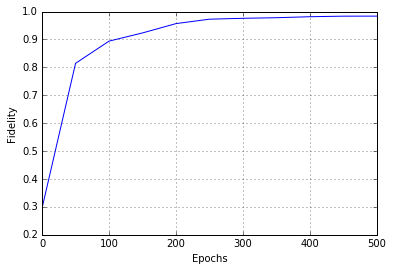

In [14]:
rbm_real = BinomialRBM(num_visible, num_hidden)
rbm_real.fit(train_set, true_psi, epochs, batch_size, k, lr, log_every)

## After Training 

After training your RBM, the *fit* function will have saved your trained weights and biases. Now, we can generate samples from our trained RBM and calculate the observables. Let's calculate the energy and the magnetization of newly generated samples.

**TFIMChainEnergy** and **TFIMChainMagnetization** objects (from *observables_tutorial*) have a sampler function called *sample* built into them. They will generate samples from the RBM distribution learned in the training procedure, compute the observables and plot the computed values as a function of CD step.
All that needs to be done is to feed in the following arguments into the objects' *sample* functions:

1. ***sampler***: the RBM object that we've trained
2. ***num_samples***: the number of samples we wish to generate
3. ***k***: the number of contrastive divergence steps that will be used to generate all of those samples

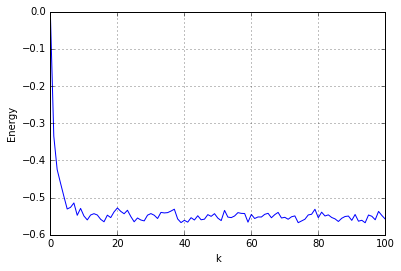

In [15]:
rbm_energy = TFIMChainEnergy(h=0.0) # TFIMChainEnergy requires the h value for initialization
energies = rbm_energy.sample(sampler=rbm_real, num_samples=1000, k=100)

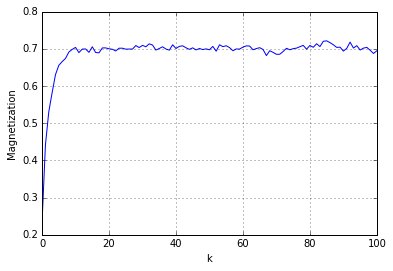

In [16]:
rbm_mag    = TFIMChainMagnetization()
magnetizations = rbm_mag.sample(sampler=rbm_real, num_samples=1000, k=100)

And there you have it! For more information on using QuCumber on your machine, please refer to **LINK TO DOCUMENTATION**. If you are interested in learning about training a **ComplexRBM** object, please click [here](./QuCumberTutorialComplex.html).